In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.13/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.13/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.13/libexec/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("../")
print(os.getcwd())
# os.chdir("../data/lighting-nopadding/")

/Users/malina/Desktop/TUD/Research Project/PaymentRouting


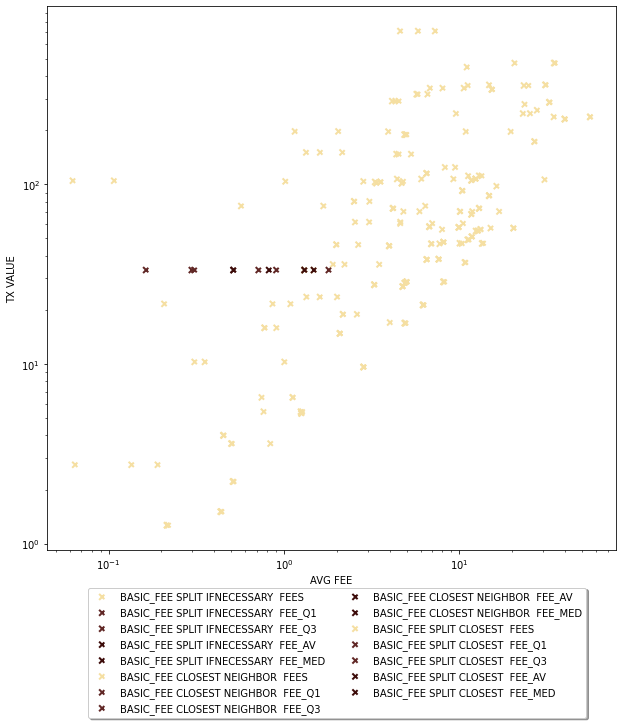

In [3]:
# root = os.getcwd()
# drcts = os.listdir(root)
# for drc in drcts:
#     if drc != ".DS_Store":
#         print(drc)
#         curr = os.listdir(root+'/'+drc)
        
#         for d in curr:
#             print(d, "\n")


root = os.getcwd()
all_files = os.listdir(root)
files = filter(lambda x: x[-4:] == '.txt', all_files)
params =["TX_VAL","TRIAL","FEES","OFFERED_FEE","FINAL_FEE","NODES",
         "SUCCESS","FAILURE", "FEE_Q1", "FEE_Q3", "FEE_AV", "FEE_MED", "SUCCESS_FRAC", "HOPS_AV", "HOPS_SUCC"]
params_txt = ["FEE_MODEL", "SPLITTING_PROTOCOL", "SUCCESS", "FAILURE"]
split_protocols = ["CLOSEST NEIGHBOR", "SPLIT CLOSEST", "SPLIT IFNECESSARY"]
fee_models = ["RATIO_DIFF", "BASIC_FEE", "ABSOLUTE_DIFF", "LIGHTNING_FEES"]

data = {}
# for fee in fee_models:
#     for split_prot in split_protocols:
#         for param in params:
#             data[(fee,split_prot,param)] = []
        

for file in files:
    if "eval" in file:
        config = file.split(";")
        fee=config[1].split("_")
        fee_model = str(fee[0] + "_" + fee[1])
        base_rate = config[1].split("_")[2]
        fee_rate = config[1].split("_")[3][:6]
        split_prot = str(config[2].split(".")[0].split("_")[0] + " " + config[2].split(".")[0].split("_")[1])
        data_dict = {}
        idx = 0
        for line in open(file, 'r'):
            arr = []
            vals = [s for s in line.split(":")]
            if '\n' in vals:
                idx +=1
            if "\n" not in vals and "FEE_MODEL" not in vals and "SPLITTING_PROTOCOL" not in vals:# and "FEES" not in vals:
                stat=vals[0]
                values = vals[1]
                for e in (values.split()):
                    if stat in params_txt:
                        arr.append(e)
                    else:
                        arr.append(float(e))
                        
                n = (idx, fee_model,split_prot,stat)
                if n not in data.keys():
                    data[n] = []
                data[n].extend(arr)

# for d in data:
#     print(d, '        - ', len(data[d]))
vig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True)
shown = []

# ax=fig.add_axes([0,0,1,1])
color= {"RATIO_DIFF":"red", "BASIC_FEE":"#9CB7CE", "ABSOLUTE_DIFF":"orange", "LIGHTNING_FEES":"#4F6171"}
# fees["BASIC_FEE"] = []
# txs["BASIC_FEE"] = []
# fees["LIGHTNING_FEES"] = []
# txs["LIGHTNING_FEES"] = []
fee = []
for idx, fee_model, split_prot, stat in data.keys():
    if fee_model in ("BASIC_FEE"):
        txt = ""
        marker = 'o'
        color = "green"
#         print(stat)
        if stat in ["TX_VAL", "SUCCESS", "FAILURE", "FEES", "FEE_AV", "FEE_MED", "FEE_Q1", "FEE_Q3"]:
            color="#f5dfa2"
            val = ""
            if "TX" in stat:
                tx_val = data[(idx, fee_model, split_prot, stat)]
            else:
                val = data[(idx, fee_model, split_prot,  stat)]
#                 print('ss',stat, val)
                if "SUCCESS" in stat:
                    if "True" in val:
                        color="#576b65"
                        txt="successful"
                    else:
                        marker='x'
                        color="orange"
                        txt="unsuccessful"
                if "FAILURE" in stat:
                    if "True" in val:
                        txt=val
                        marker='x'
                        color="blue"    
                    else:
                        color="#576b65"
                        txt="successful"
                avg = 0
                if "FEES" in stat:
#                     print('in if',str(st), ("FEES" in (str)(st)))
                    if "str" not in str(type(val)) and "float" not in str(type(val)):
#                         print('nested',st, type(str), type(val))
                        for v in val:
                            try:
                                avg += float(v)
                            except ValueError:
                                print("Not a float", v)
                                break
                        val = avg/len(val)
                if "Q1" in stat or "Q3" in stat:
                    color="#612826"
                    marker='+'
                    
                if "FEE_AV" in stat or "FEE_MED" in stat:
                    color="#3d0c0a"
                    marker='.'

                if "list" in str(type(val)):
                    val = val[0]
                if "float" in str(type(val)):
                    tx = tx_val[0]
#                     print(stat)
                    plt.scatter(val, tx, marker='x', linestyle='dashed', linewidth=2, label=str(fee_model) + " " + str(split_prot) + " " +str(txt) + " " + stat, color=color)
#                         print("C")
#                 else:
#                     print(str(type(val)), val)
       
            
#             print(data[idx, fee_model, split_prot, 'FEE_AV'])
#             print(data[idx, fee_model, split_prot, 'TX_VAL'])
#     ax.scatter(grades_range, boys_grades, color='b')

plt.legend()
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
plt.xscale("log")
plt.yscale("log")
ax.set_xlabel('AVG FEE')
ax.set_ylabel('TX VALUE')
# ax.set_title('')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.gcf().set_size_inches(17, 10)
plt.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.51, -0.06), shadow=True, ncol=2)

plt.show()

In [4]:
print(data_dict)

{}


In [5]:
# for root,dirs,files in os.walk(os.getcwd()):
#     for file in files:
#         if "_singles" in file:
#             if("ROUTE_PAYMENT" in root):
#             # print(root, '\n')
#                 path = root + '/' + file
#                 folders = path.split("/")
#                 config = folders[9]
#                 run = folders[10]
#                 protocol = folders[10]
#                 if run.isnumeric():
#                     protocol = folders[11]
#                 else:
#                     run = -1

#                 for line in open(path, 'r'):
# #                     print(path)
#                     vals = [s for s in line.split()]
#                     values = []
#                     values.append(vals[0].split('=')[0])
#                     values.append(vals[0].split('=')[1])
#                     values.extend(vals[1:])
#                     dc = [config, run, protocol, values]
# #                     print(dc, '\n')
#                     data.append(dc)
# Y = {}
# times = 21
# bp = []
# excl = []
# for idx, d in enumerate(data):
#     config=d[0]
#     run=d[1]
#     protocol=d[2]
#     p1 = "ROUTE_PAYMENT-1-false-HOP_DISTANCE-SPLIT_CLOSEST-2147483647-BASIC_FEE_0.1"
#     p2 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-SPLIT_CLOSEST-2147483647-LIGHTNING_FEES_1.0_1.0_false-4-1-false"
#     p3 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_9-CLOSEST_NEIGHBOR-2147483647-ABSOLUTE_DIFF_1.0_1.0_false-4-1-false"
#     p4 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-CLOSEST_NEIGHBOR-2147483647-RATIO_DIFF_0.05_1.0_false-4-1-false"
#     p5 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-CLOSEST_NEIGHBOR-2147483647-BASIC_FEE_0.1"
#     if True:
#         stat=d[3][0]
#         values = d[3][1:]
#         print(values)
#         if stat not in Y.keys():
#             if len(values) > 1:
#                 Y[stat+"-avg"]= values[0]
#                 Y[stat+"-med"]= values[1]
#                 Y[stat+"-min"]= values[2]
#                 Y[stat+"-max"]= values[3]
#                 Y[stat+"-sd"]= values[4]
#                 Y[stat+"-cilow"]= values[5]
#                 Y[stat+"-cihigh"]= values[6]
#             else:
#                 Y[stat] = []
#                 Y[stat] = values
#         elif len(values) > 1:
#             Y[stat+"-avg"]= values[0]
#             Y[stat+"-med"]= values[1]
#             Y[stat+"-min"]= values[2]
#             Y[stat+"-max"]= values[3]
#             Y[stat+"-sd"]= values[4]
#             Y[stat+"-cilow"]= values[5]
#             Y[stat+"-cihigh"]= values[6]
#         else:
#             Y[stat].extend(values)

# #       X = np.full(len(values), run)
#         if times > 0:
#             for st in Y.keys():
#                 st = st.split('-')[0]
#                 if st not in excl and len(values) > 1:
#                     excl.append(st)
#                     mean = float(Y[st+"-avg"])
#                     med = float(Y[st+"-med"])
#                     mmin = float(Y[st+"-min"])
#                     mmax = float(Y[st+"-max"])
#                     std = float(Y[st+"-sd"])
#                     q1 = float(Y[st+"-med"])-0.675*float(Y[st+"-sd"])
#                     q3 = float(Y[st+"-med"])+0.675*float(Y[st+"-sd"])
#                     wl = q1-1.5*(q3-q1)
#                     wh = q3+1.5*(q3-q1)
#                     stats = [{
#                         "label": 'A',  # not required
#                         "mean":  mean,  # not required
#                         "med": med,
#                         "min": mmin,
#                         "max": mmax,
#                         "std": std,
#                         "q1": q1,
#                         "q3": q3,
#                         # "cilo": 5.3 # not required
#                         # "cihi": 5.7 # not required
#                         "whislo": wl,
#                         "whishi": wh
#         #                 "fliers": []  # required if showfliers=True
#                         }]

#                     fs = 10  # fontsize

#                     fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True)
#                     bp = axes.bxp(stats,showfliers=None,showmeans=True, showcaps=True,
#                                 showbox=True,manage_ticks=True,meanline=True,
#                                 patch_artist=True,
#                                 boxprops=dict(facecolor="thistle", edgecolor="darkturquoise"),
#                                 capprops=dict(color="darkslategrey"),
#                                 whiskerprops=dict(color="darkmagenta"),
#                                 flierprops=dict(color="darkturquoise", markeredgecolor="darkturquoise"),
#                                 medianprops=dict(color="darkmagenta"))
#                     axes.set_title(protocol + "\n" + st, fontsize=fs)
#                     plt.text(1.2, mean, 'mean='+str(mean), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     plt.text(1.2, med, 'med='+str(med), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
# #                     plt.text(1.2, mmin, 'mmin', bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
# #                     plt.text(1.2, mmax, 'mmax', bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     plt.text(1.2, q1, 'q1='+str(q1), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     plt.text(1.2, q3, 'q3='+str(q3), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     ## change outline color, fill color and linewidth of the boxes
#     #                 for box in bp['boxes']:
#     #                     # change outline color
#     #                     box.set( color='#7570b3', linewidth=2)
#     #                     # change fill color
#     #                     box.set( facecolor = '#1b9e77' )

#     #                 ## change color and linewidth of the whiskers
#     #                 for whisker in bp['whiskers']:
#     #                     whisker.set(color='#7570b3', linewidth=2)

#     #                 ## change color and linewidth of the caps
#     #                 for cap in bp['caps']:
#     #                     cap.set(color='#7570b3', linewidth=2)

#     #                 ## change color and linewidth of the medians
#     #                 for median in bp['medians']:
#     #                     median.set(color='#b2df8a', linewidth=2)

#     #                 ## change the style of fliers and their fill
#     #                 for flier in bp['fliers']:
#     #                     flier.set(marker='o', color='#e7298a', alpha=0.5)

#                     plt.show()
#                     times -= 1

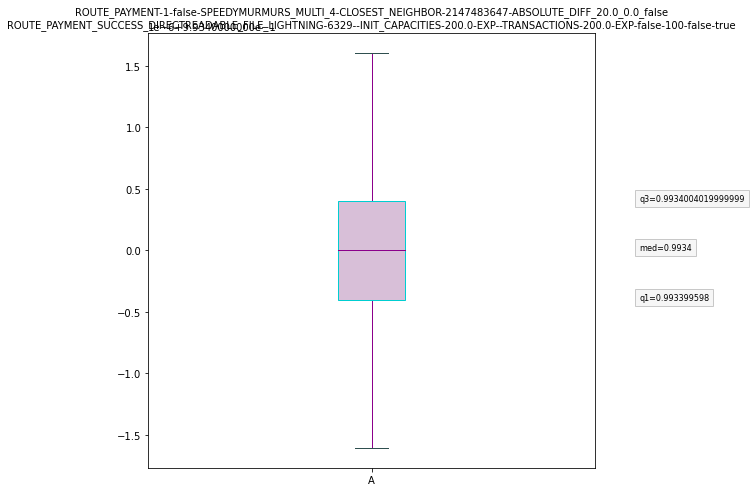

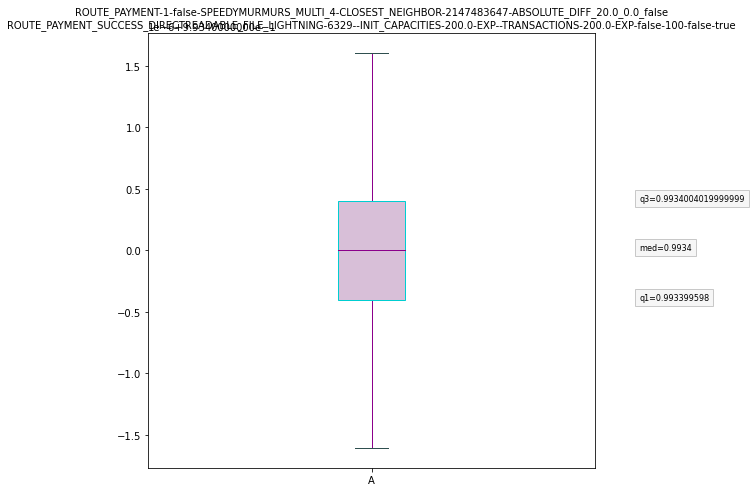

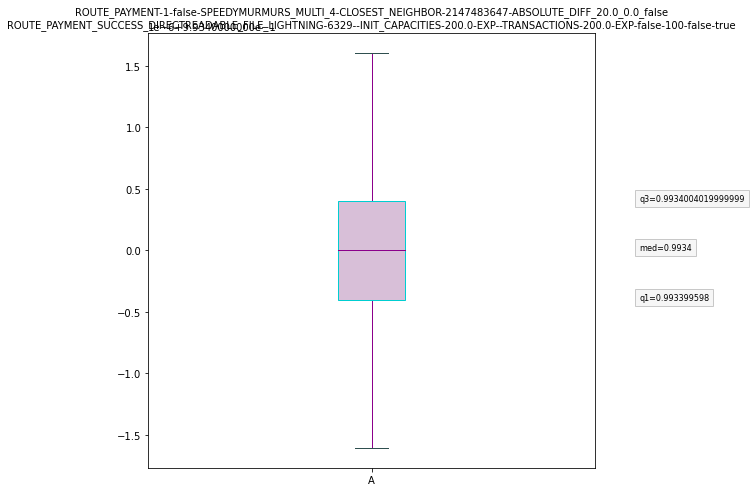

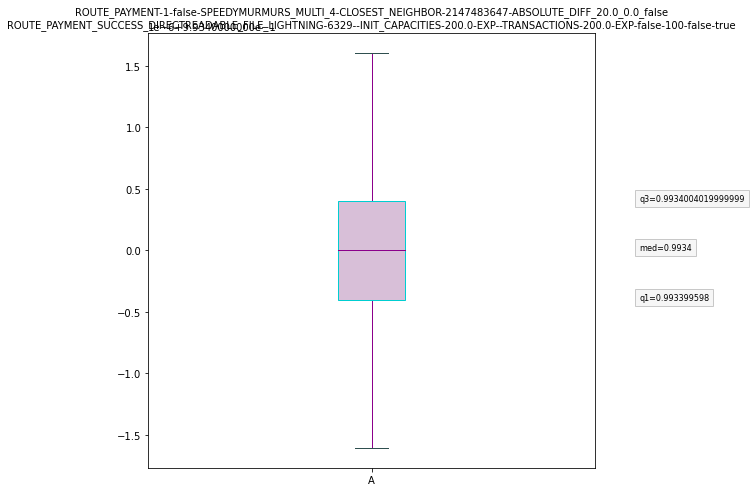

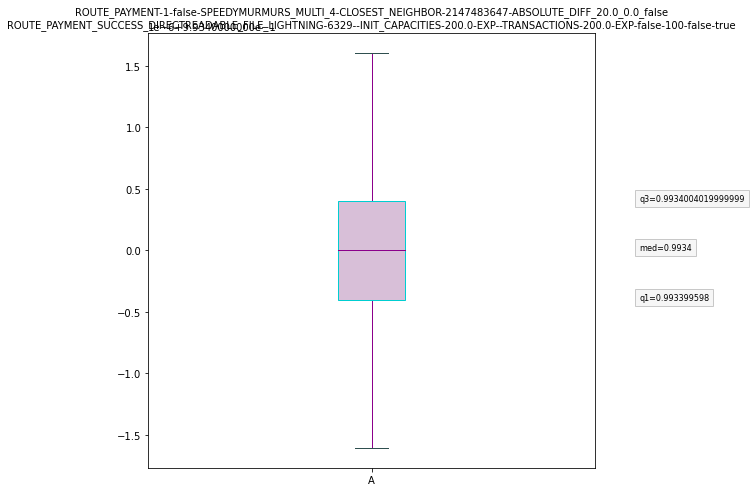

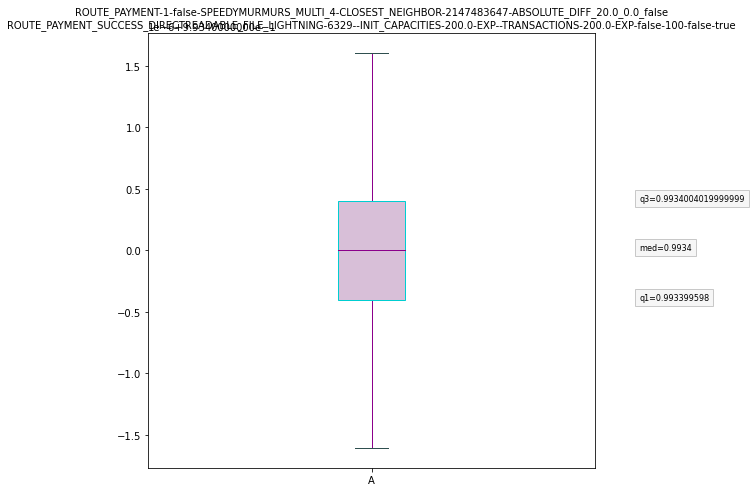

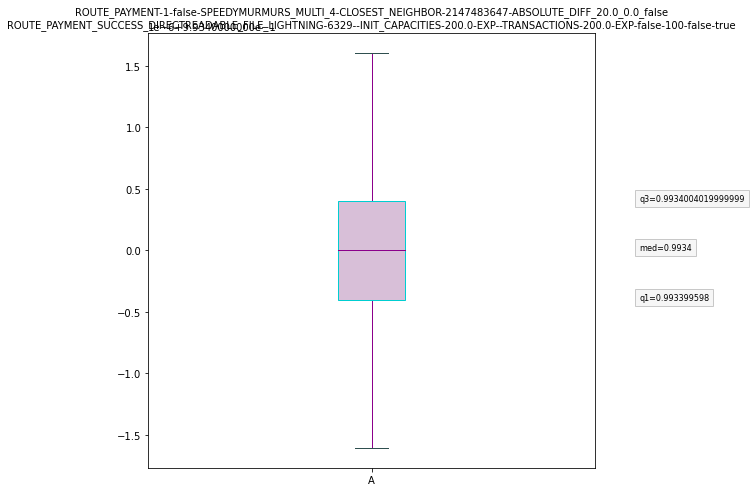

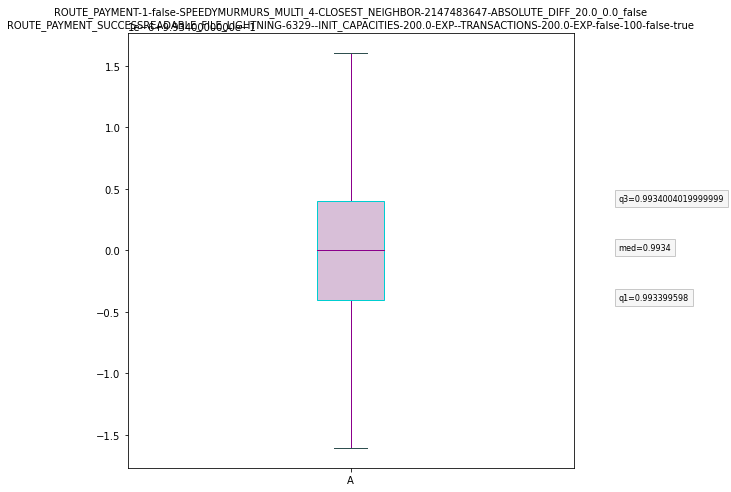

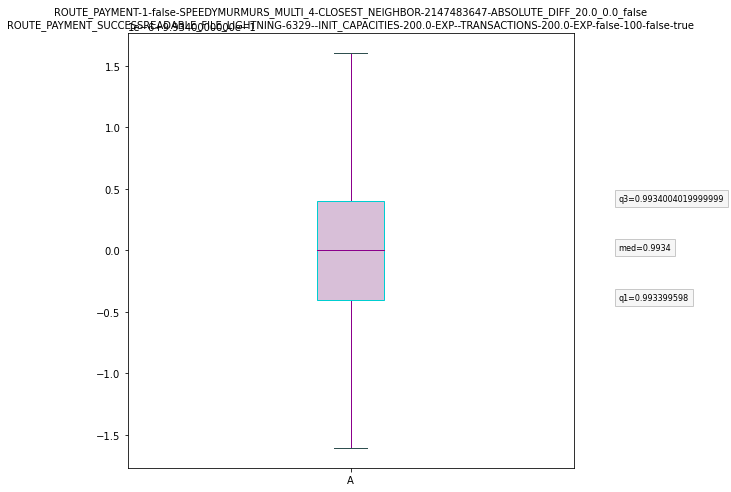

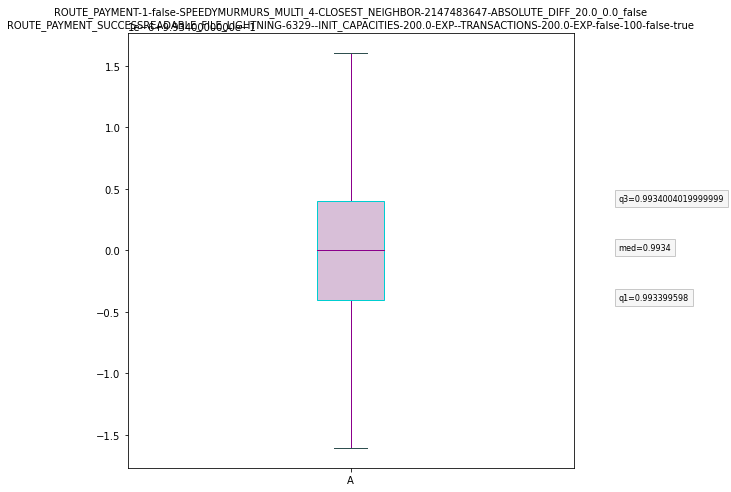

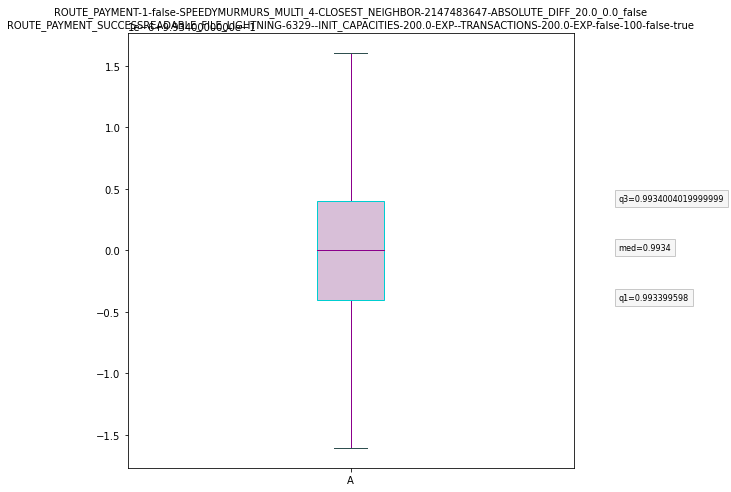

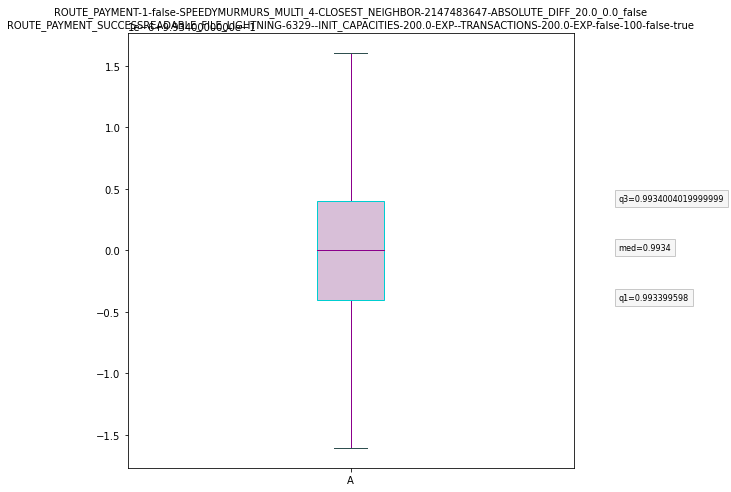

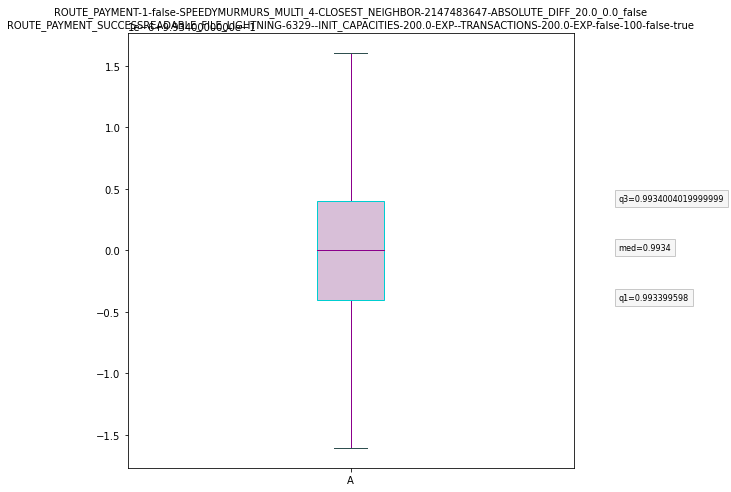

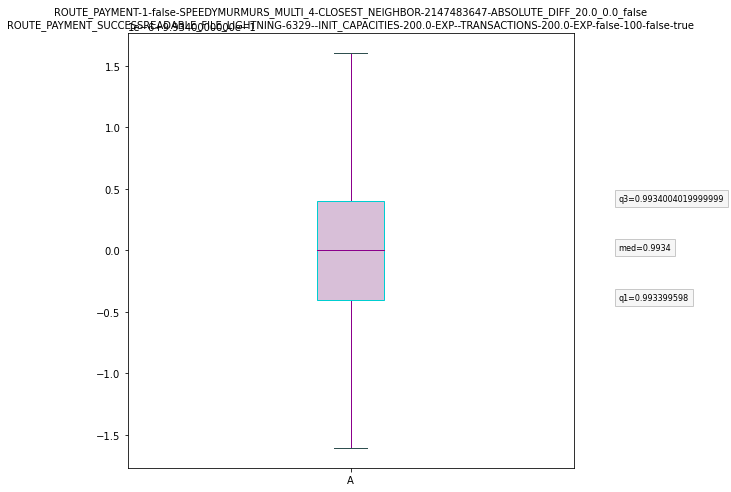

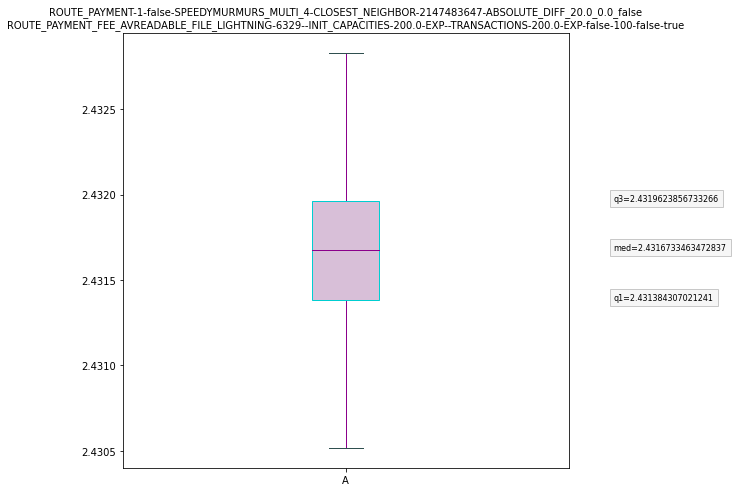

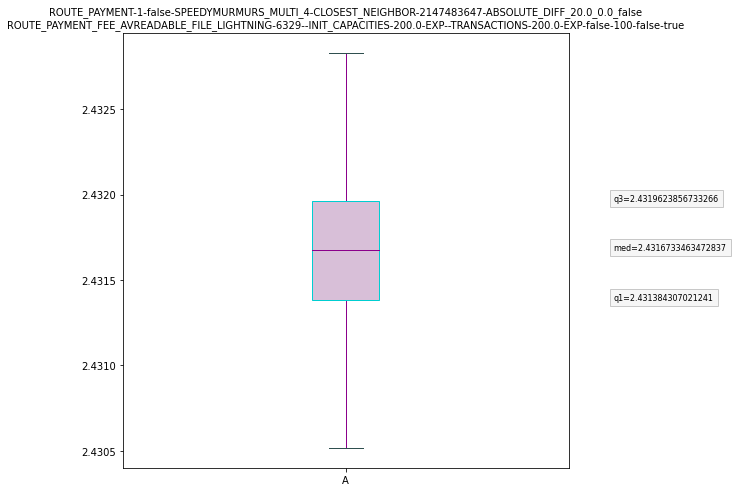

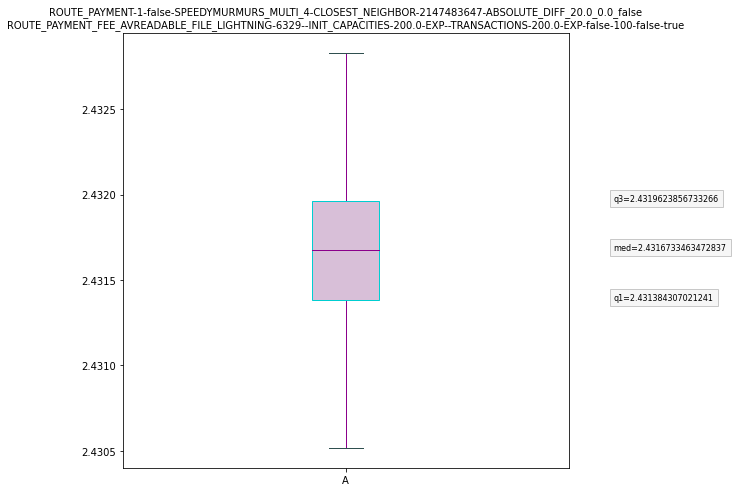

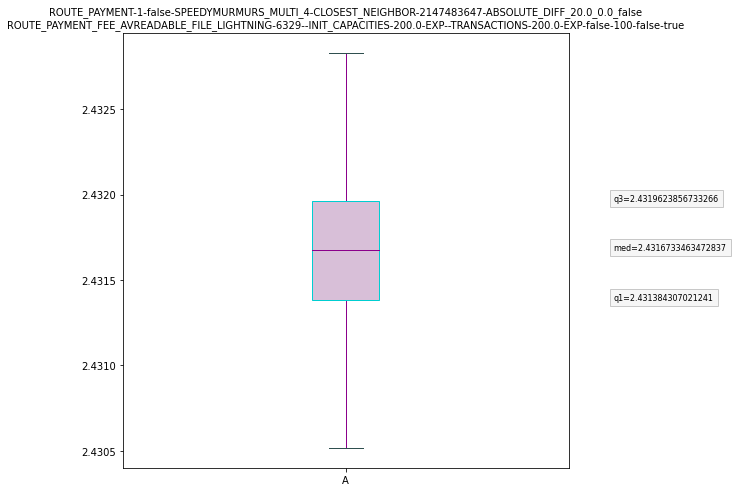

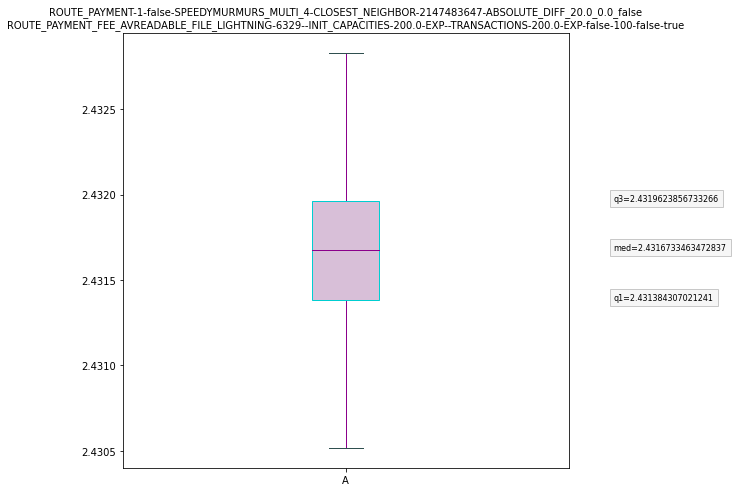

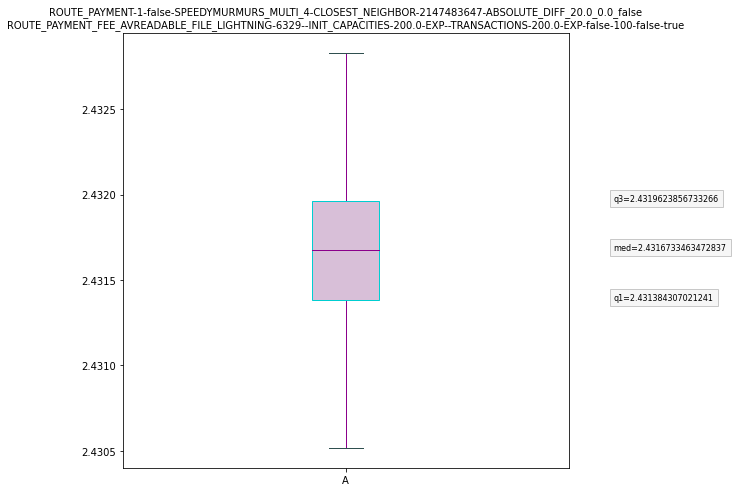

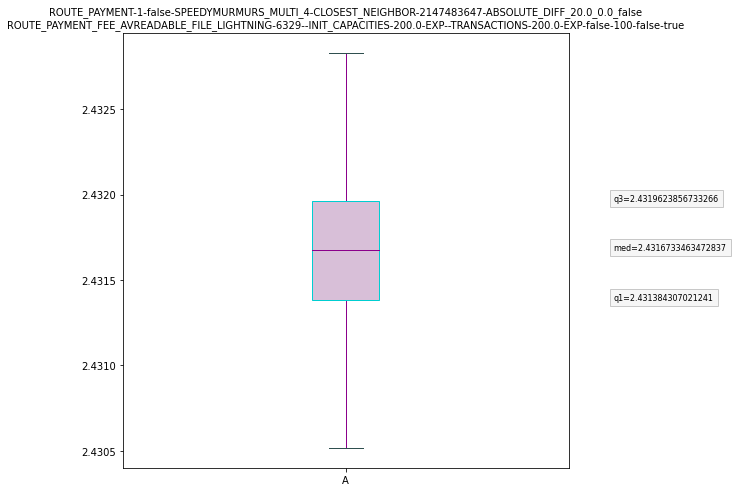

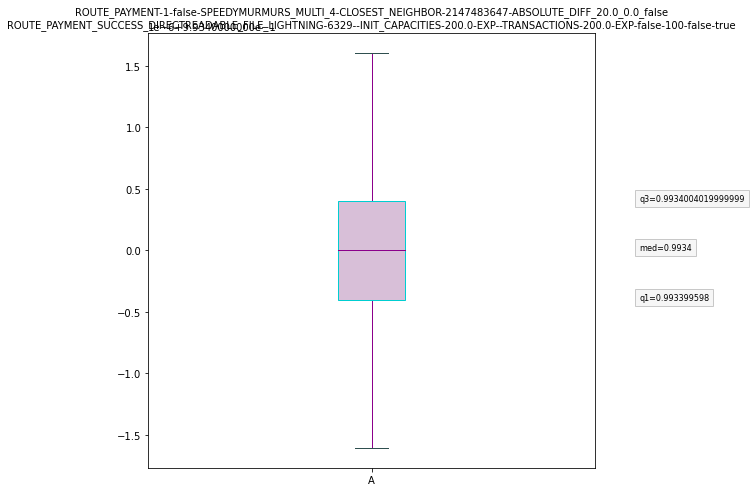

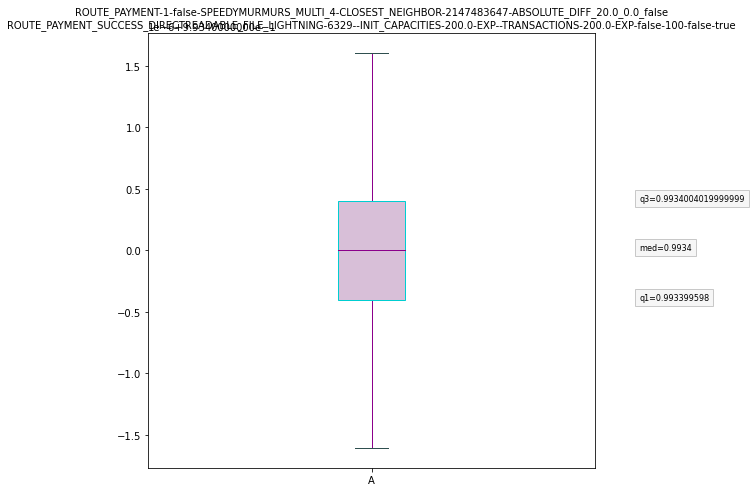

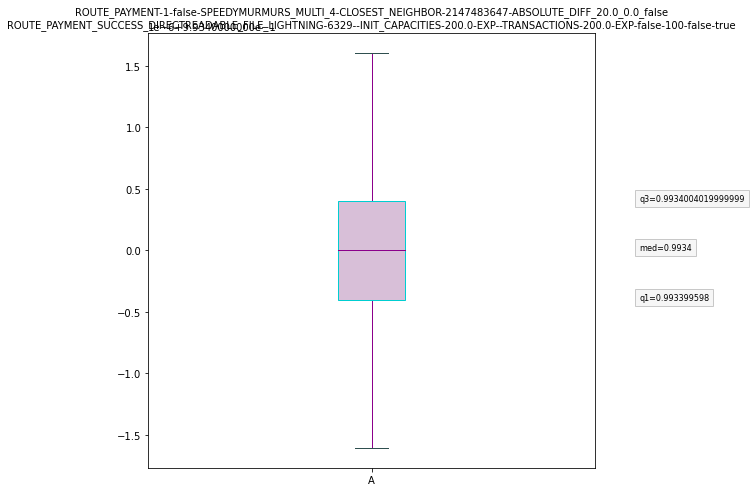

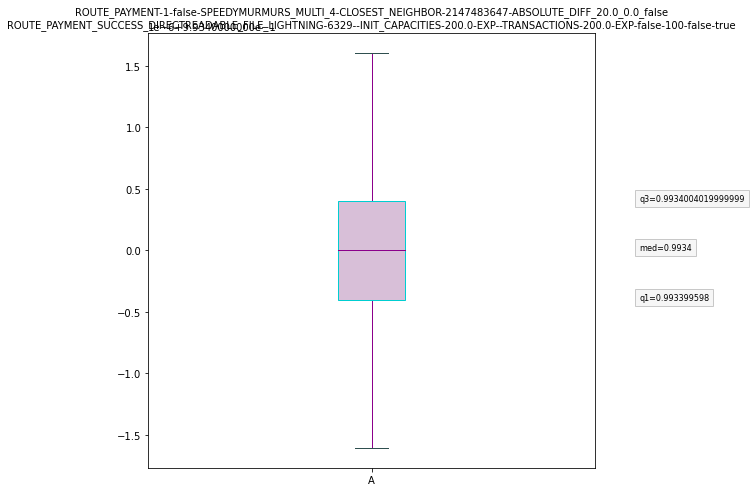

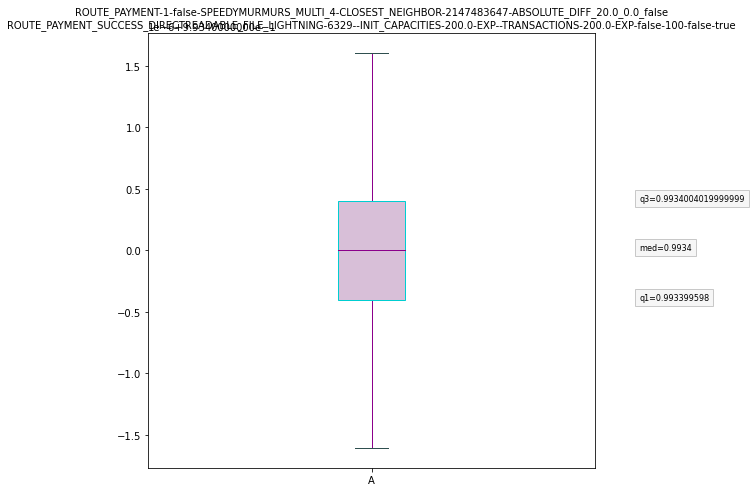

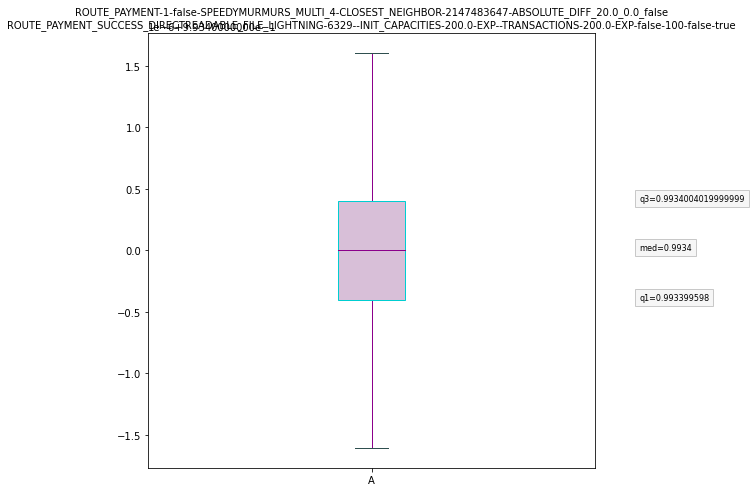

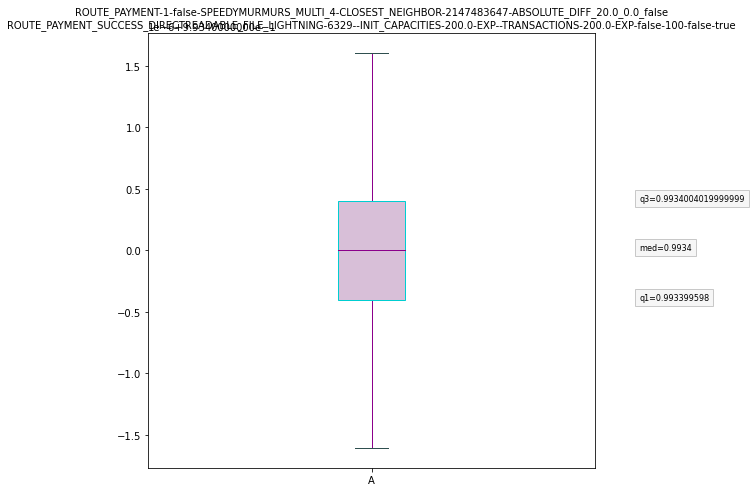

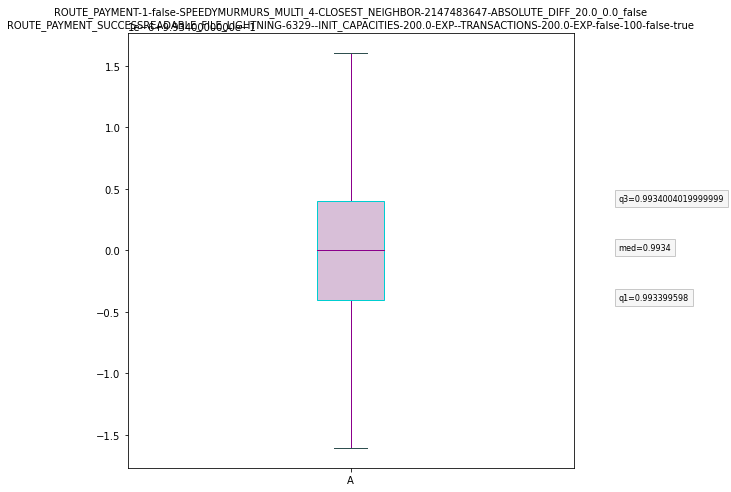

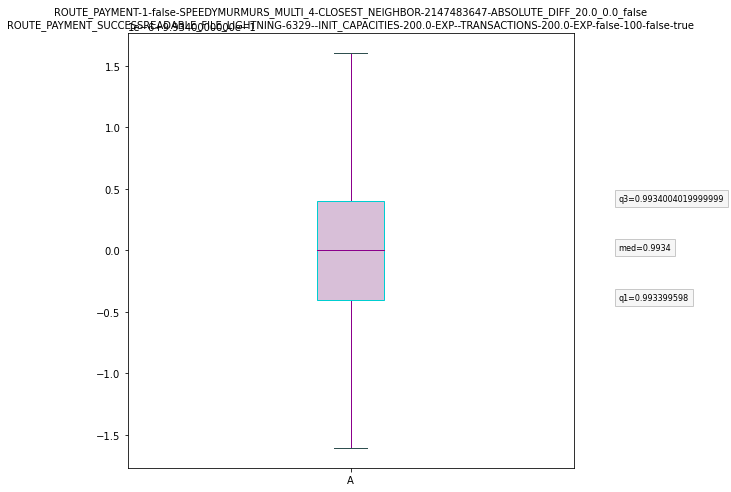

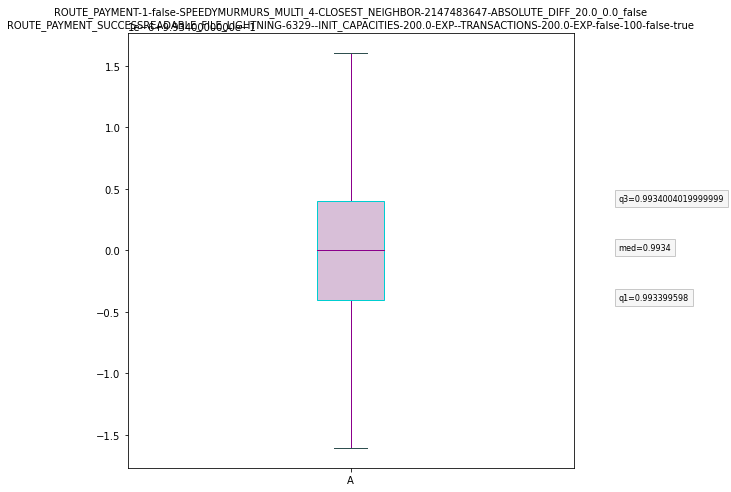

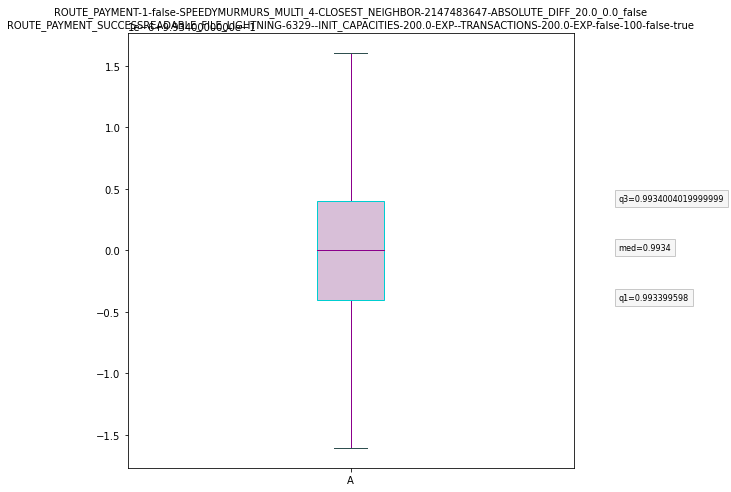

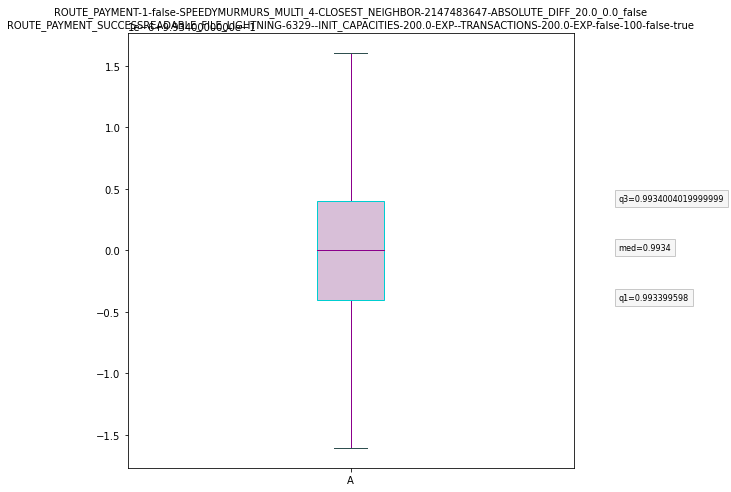

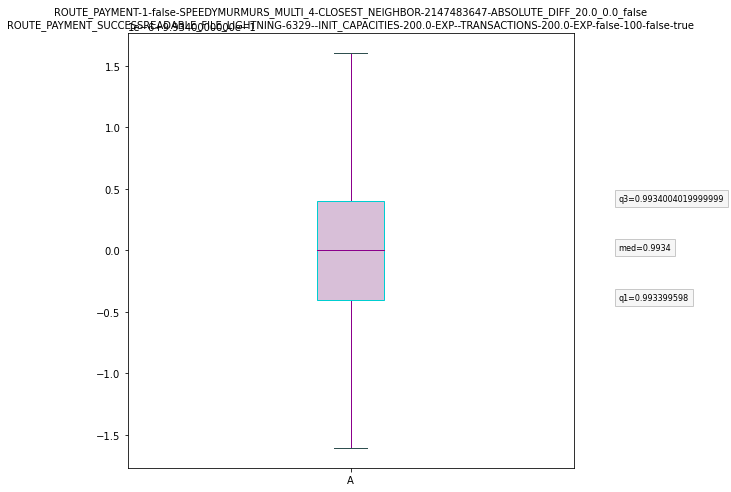

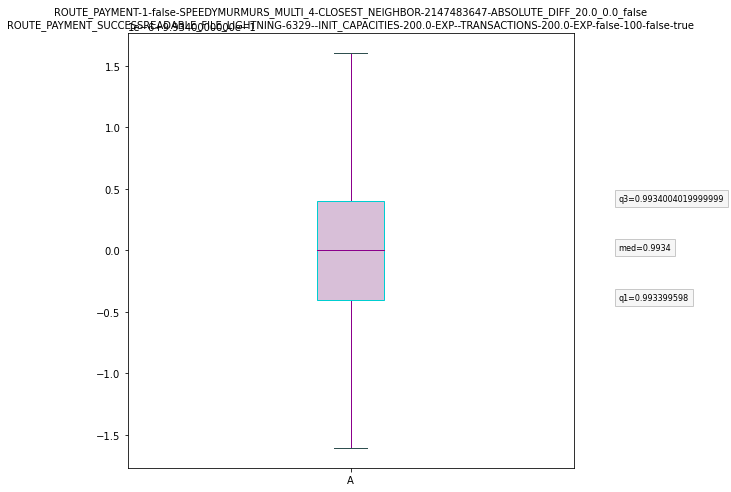

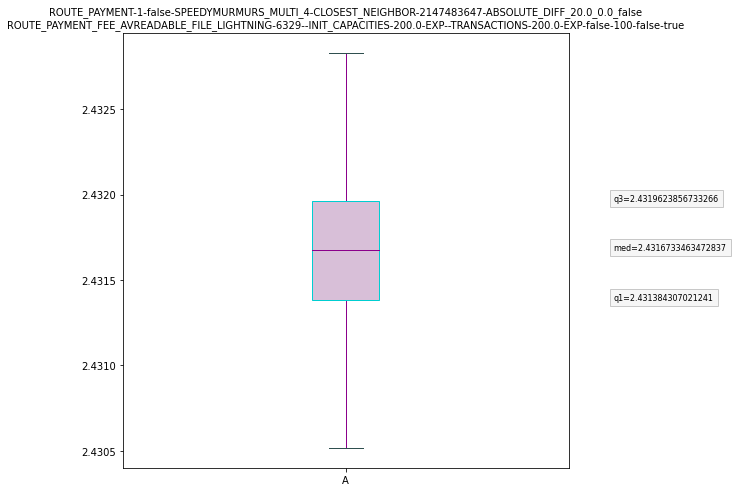

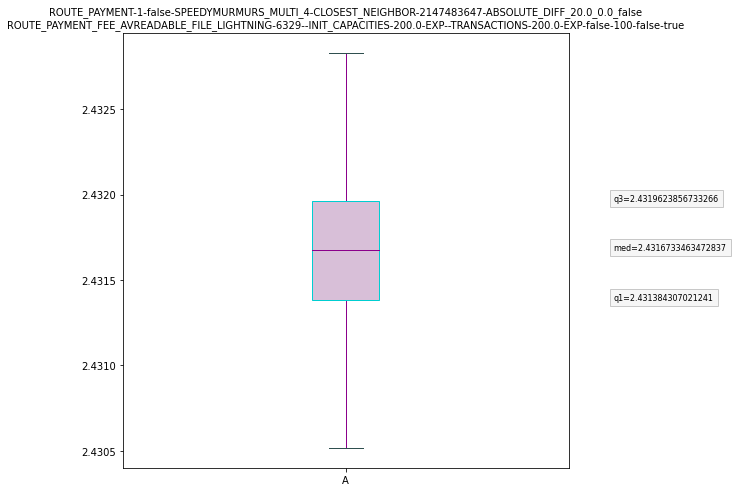

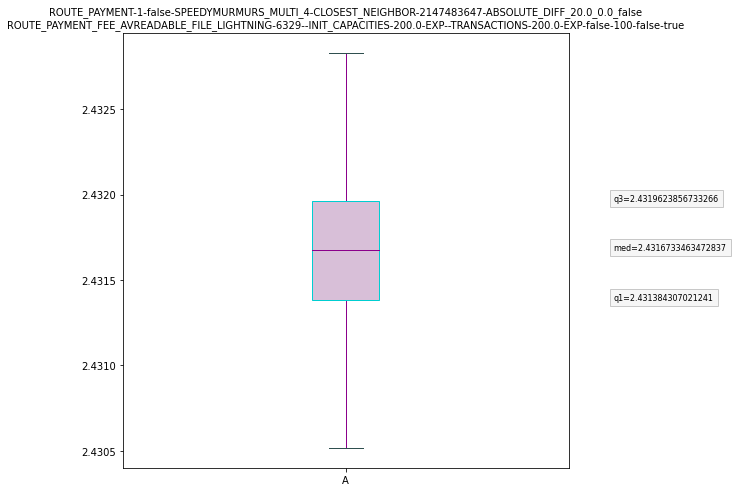

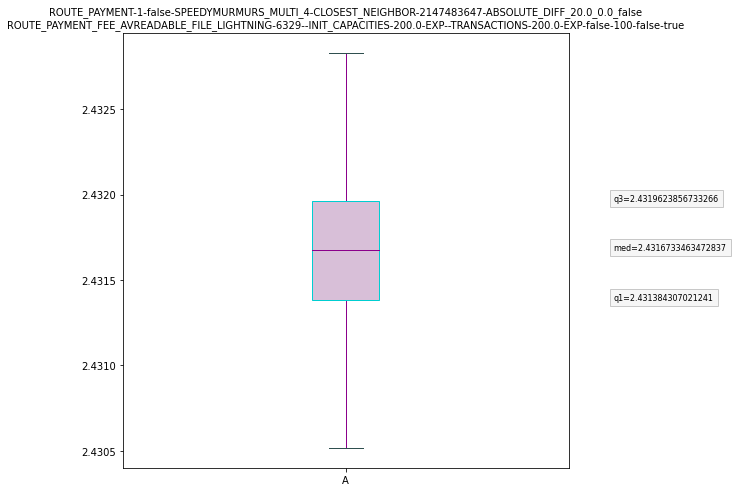

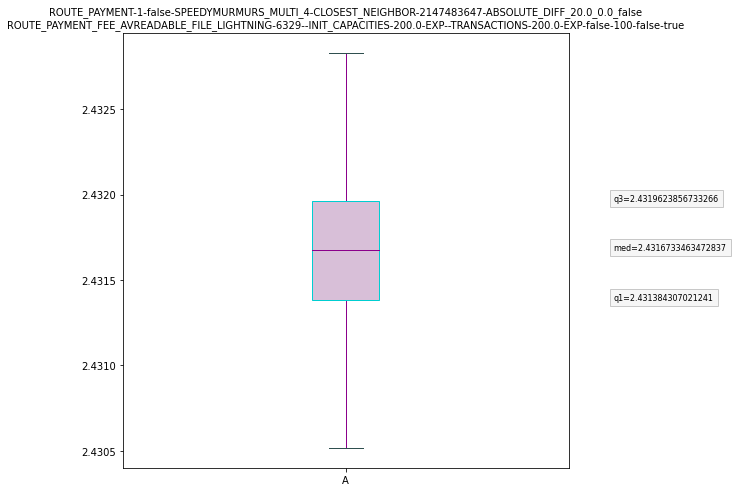

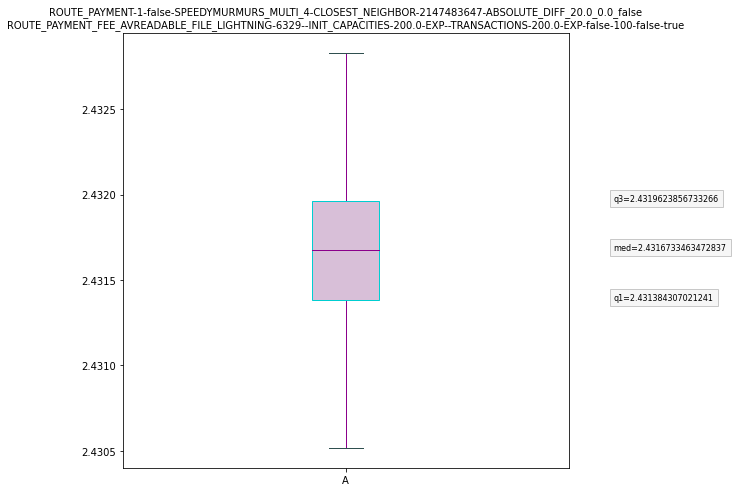

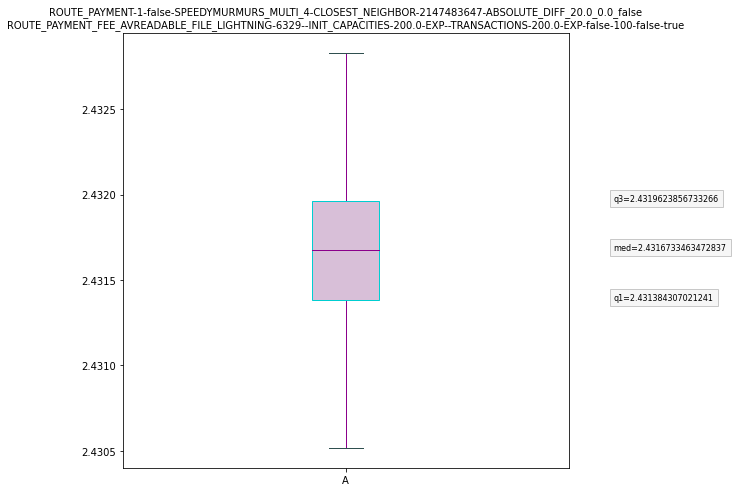

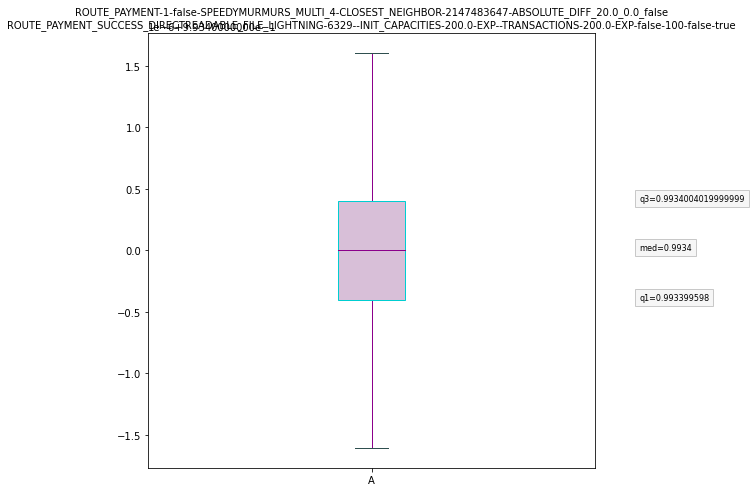

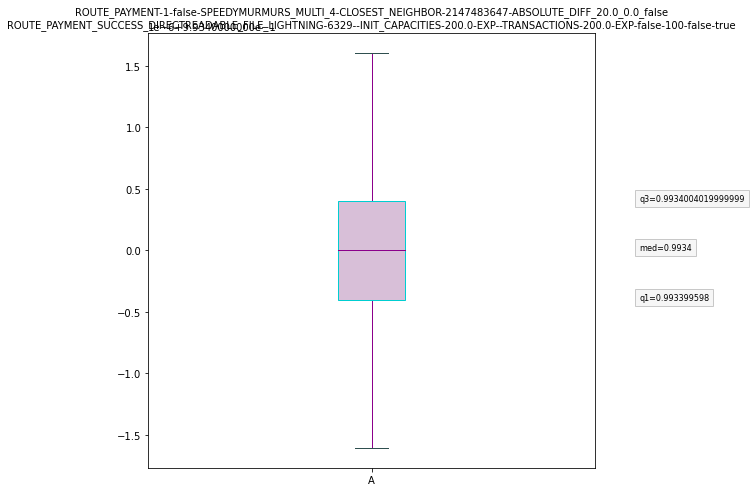

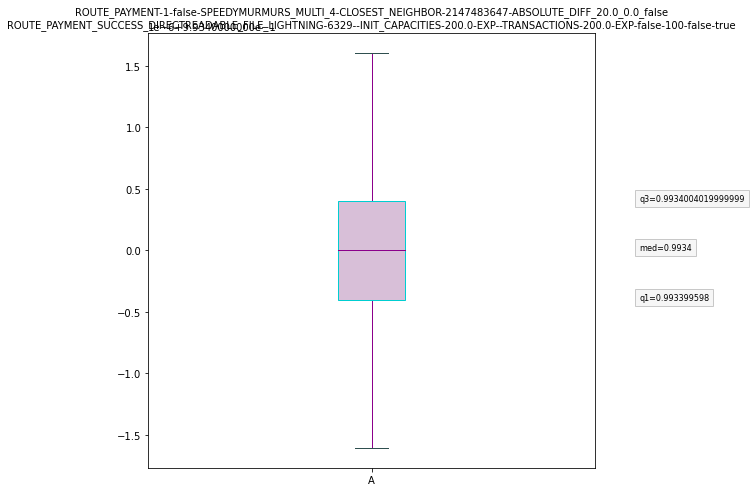

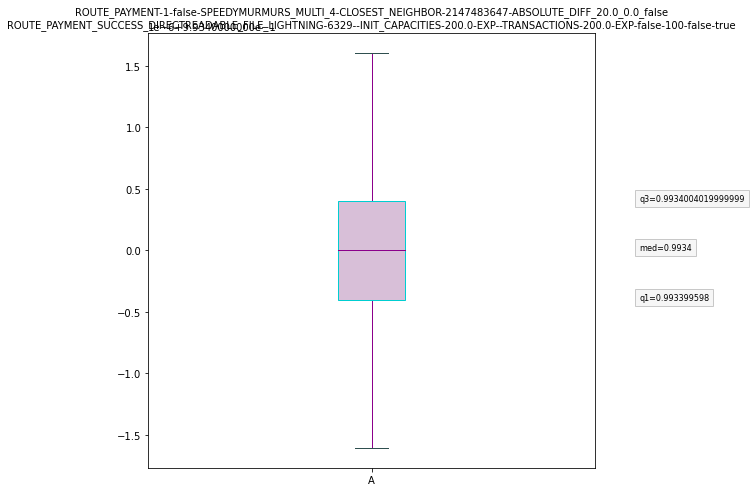

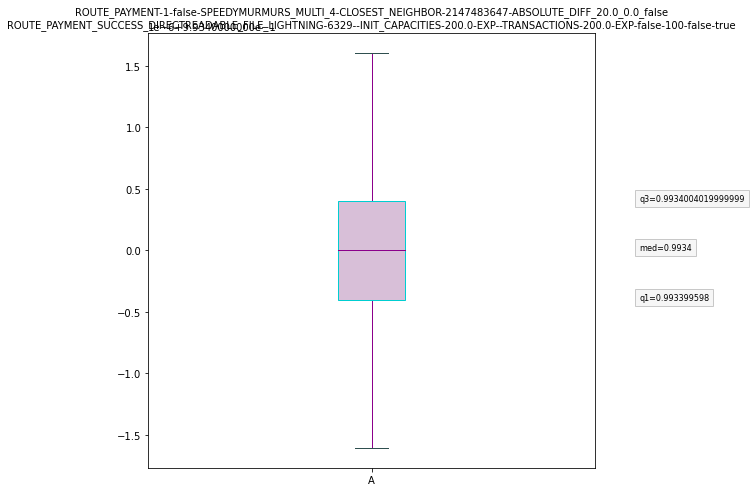

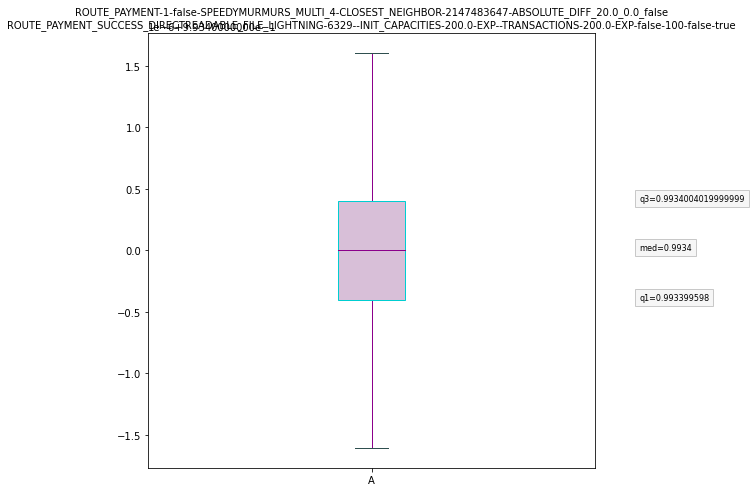

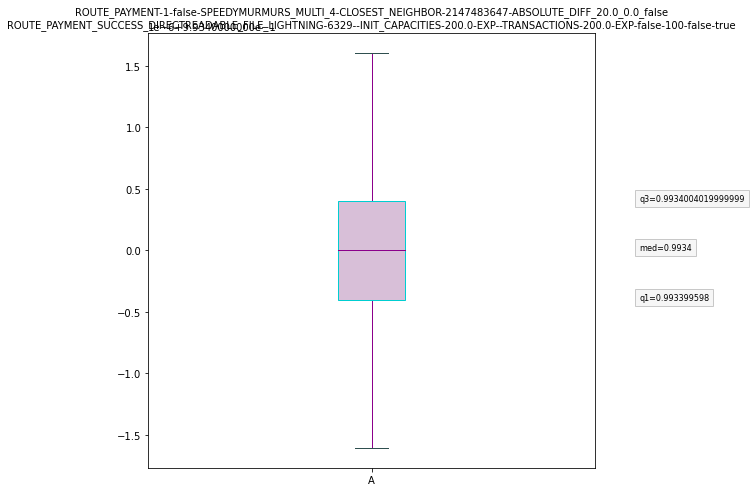

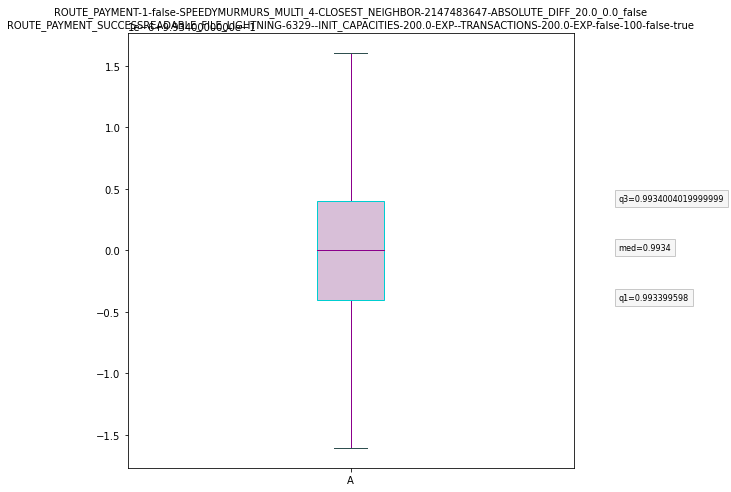

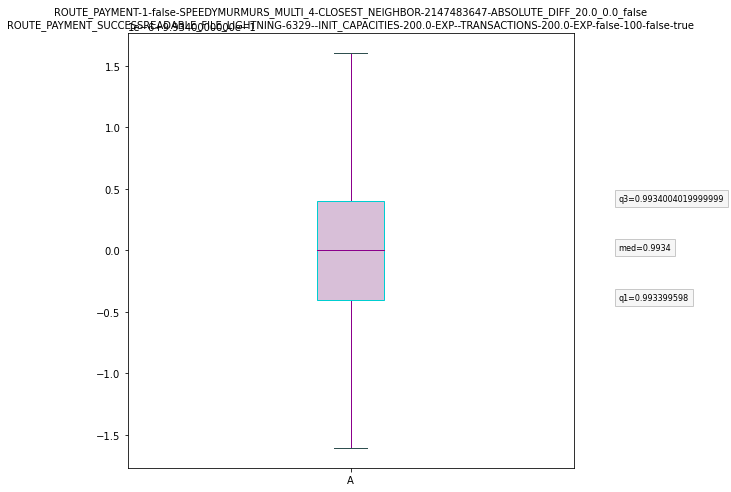

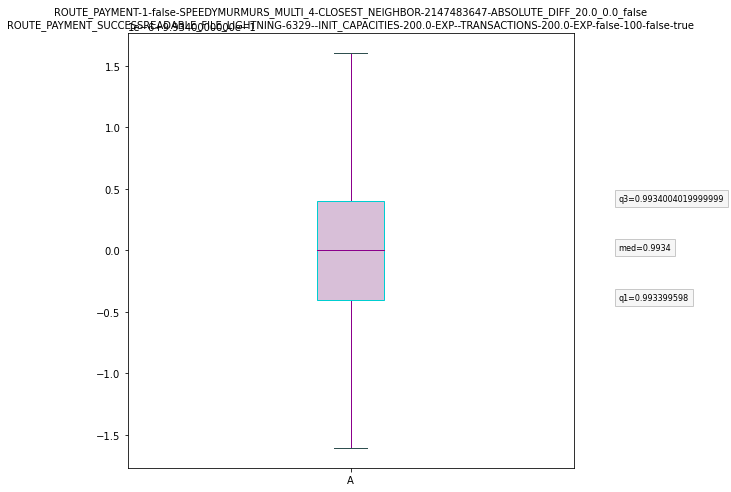

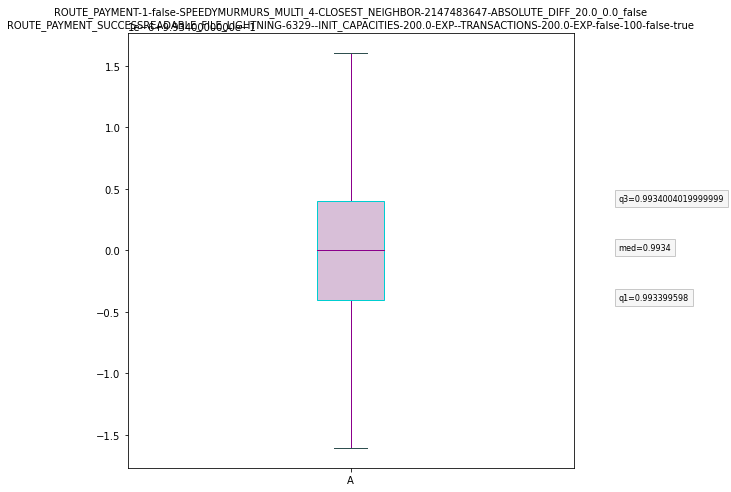

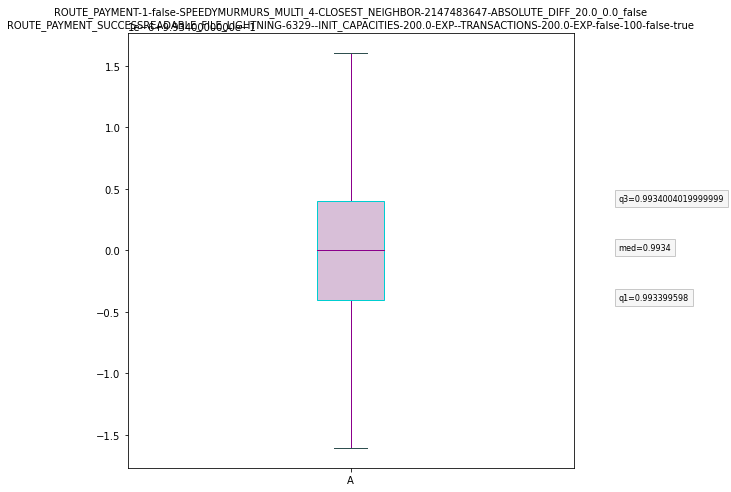

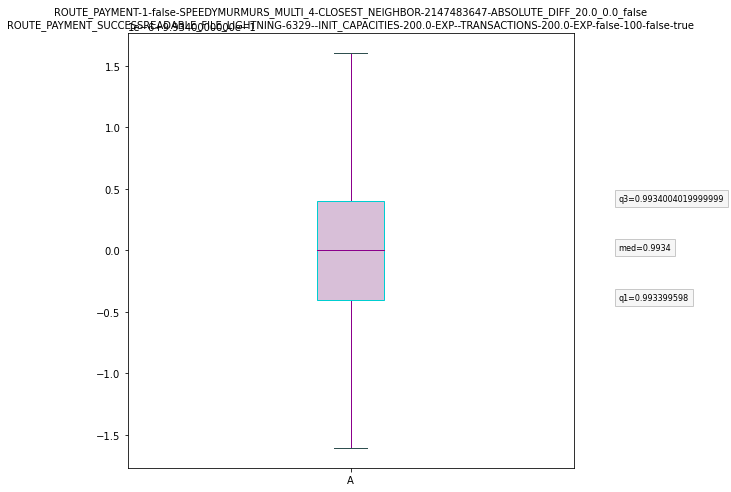

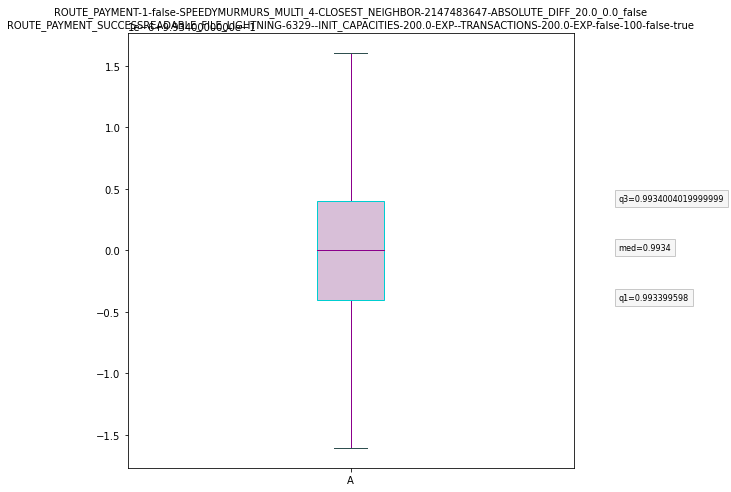

In [ ]:
# root = os.getcwd()
# drcts = os.listdir(root)
# for drc in drcts:
#     if drc != ".DS_Store":
#         print(drc)
#         curr = os.listdir(root+'/'+drc)
        
#         for d in curr:
#             print(d, "\n")

data = []
for root,dirs,files in os.walk(os.getcwd()):
    for file in files:
        if "_singles" in file:
            if("ROUTE_PAYMENT" in root):
            # print(root, '\n')
                path = root + '/' + file
                folders = path.split("/")
                config = folders[9]
                run = folders[10]
                protocol = folders[10]
                if run.isnumeric():
                    protocol = folders[11]
                else:
                    run = -1

                for line in open(path, 'r'):
                    vals = [s for s in line.split()]
                    values = []
                    values.append(vals[0].split('=')[0])
                    values.append(vals[0].split('=')[1])
                    values.extend(vals[1:])
                    dc = [config, run, protocol, values]
#                     print(dc, '\n')
                    data.append(dc)
Y = {}
times = 700
bp = []
excl = []
for idx, d in enumerate(data):
    config=d[0]
    run=d[1]
    protocol=d[2]
#     p1 = "ROUTE_PAYMENT-1-false-HOP_DISTANCE-SPLIT_CLOSEST-2147483647-BASIC_FEE_0.1"
#     p2 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-SPLIT_CLOSEST-2147483647-LIGHTNING_FEES_1.0_1.0_false-4-1-false"
#     p3 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_9-CLOSEST_NEIGHBOR-2147483647-ABSOLUTE_DIFF_1.0_1.0_false-4-1-false"
#     p4 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-CLOSEST_NEIGHBOR-2147483647-RATIO_DIFF_0.05_1.0_false-4-1-false"
#     p5 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-CLOSEST_NEIGHBOR-2147483647-BASIC_FEE_0.1"
    if True and run== -1:
        stat=d[3][0]
        values = d[3][1:]
#         print(len(values), path)
        if stat not in Y.keys():
            if len(values) > 1:
                Y[stat+"-avg"]= values[0]
                Y[stat+"-med"]= values[1]
                Y[stat+"-min"]= values[2]
                Y[stat+"-max"]= values[3]
                Y[stat+"-sd"]= values[4]
                Y[stat+"-cilow"]= values[5]
                Y[stat+"-cihigh"]= values[6]
            else:
                Y[stat] = []
                Y[stat] = values
        elif len(values) > 1:
            Y[stat+"-avg"]= values[0]
            Y[stat+"-med"]= values[1]
            Y[stat+"-min"]= values[2]
            Y[stat+"-max"]= values[3]
            Y[stat+"-sd"]= values[4]
            Y[stat+"-cilow"]= values[5]
            Y[stat+"-cihigh"]= values[6]
        else:
            Y[stat].extend(values)

#       X = np.full(len(values), run)
        if times > 0:
            for st in Y.keys():
                st = st.split('-')[0]
#                 print(protocol)
                if "TRANSACTIONS-200.0" in config and st not in excl and len(values) > 1 and ("ROUTE_PAYMENT_FEE_AV" in st or "ROUTE_PAYMENT_SUCCESS" in st):
#                     print(protocol)

#                     excl.append(st)
                    mean = float(Y[st+"-avg"])
                    med = float(Y[st+"-med"])
                    mmin = float(Y[st+"-min"])
                    mmax = float(Y[st+"-max"])
                    std = float(Y[st+"-sd"])
                    q1 = float(Y[st+"-med"])-0.675*float(Y[st+"-sd"])
                    q3 = float(Y[st+"-med"])+0.675*float(Y[st+"-sd"])
                    wl = q1-1.5*(q3-q1)
                    wh = q3+1.5*(q3-q1)
                    stats = [{
                        "label": 'A',  # not required
                        "mean":  mean,  # not required
                        "med": med,
                        "min": mmin,
                        "max": mmax,
                        "std": std,
                        "q1": q1,
                        "q3": q3,
                        # "cilo": 5.3 # not required
                        # "cihi": 5.7 # not required
                        "whislo": wl,
                        "whishi": wh
        #                 "fliers": []  # required if showfliers=True
                        }]

                    fs = 10  # fontsize

                    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True)
                    bp = axes.bxp(stats,showfliers=None,showmeans=False, showcaps=True,
                                showbox=True,manage_ticks=True,meanline=True,
                                patch_artist=True,
                                boxprops=dict(facecolor="thistle", edgecolor="darkturquoise"),
                                capprops=dict(color="darkslategrey"),
                                whiskerprops=dict(color="darkmagenta"),
                                flierprops=dict(color="darkturquoise", markeredgecolor="darkturquoise"),
                                medianprops=dict(color="darkmagenta"))
                    axes.set_title(protocol + "\n" + st + config, fontsize=fs)
#                     plt.text(1.2, mean, 'mean='+str(mean), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
                    plt.text(1.6, med, 'med='+str(med), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     plt.text(1.2, mmin, 'mmin', bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     plt.text(1.2, mmax, 'mmax', bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
                    plt.text(1.6, q1, 'q1='+str(q1), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
                    plt.text(1.6, q3, 'q3='+str(q3), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
                    ## change outline color, fill color and linewidth of the boxes
    #                 for box in bp['boxes']:
    #                     # change outline color
    #                     box.set( color='#7570b3', linewidth=2)
    #                     # change fill color
    #                     box.set( facecolor = '#1b9e77' )

    #                 ## change color and linewidth of the whiskers
    #                 for whisker in bp['whiskers']:
    #                     whisker.set(color='#7570b3', linewidth=2)

    #                 ## change color and linewidth of the caps
    #                 for cap in bp['caps']:
    #                     cap.set(color='#7570b3', linewidth=2)

    #                 ## change color and linewidth of the medians
    #                 for median in bp['medians']:
    #                     median.set(color='#b2df8a', linewidth=2)

    #                 ## change the style of fliers and their fill
    #                 for flier in bp['fliers']:
    #                     flier.set(marker='o', color='#e7298a', alpha=0.5)
                    plt.autoscale(enable=True)
                    plt.show()
                    times -= 1



In [ ]:
# plt.figure(figsize=(12,8))    
# for st in Y.keys():
#     X = np.arange(len(Y[st]))
#     plt.plot(X, Y[st], linewidth=3, color="thistle", label=st)
#     # plt.plot(Q2, I2, linewidth=3, color="darkturquoise", label='Igor Sample intensity '+ s2.orientation)
#     # plt.plot(s1.scattering_var, s1.I_corrected, linewidth=3, color="darkslategrey",  label='Corrected intensity ' + s1.orientation)
#     # plt.plot(s2.scattering_var, s2.I_corrected, linewidth=3, color="darkmagenta",  label='Corrected intensity ' + s2.orientation)
#     plt.title(protocol)
# #     plt.xscale('log')
# #     plt.yscale('log')
#     plt.xlabel("index")
#     plt.ylabel(st)
# #   plt.xlim(0,max(values))
#     # plt.grid(True)
#     plt.legend()
#     plt.show()